# Assignment 1-Linear Regression & Logistic Regression
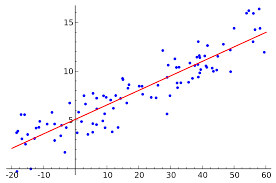

## Linear Regression-Housing
        The problem we are trying to solve here is finding a new house which is suitable to our needs and the budget we a-ssigned. The client who wants to buy the new house did her research and found some houses. She wrote the details of e-ach house she visited including location, sale condition, sale type, house price, among others. She needs some help to know how much she is expected to pay to get a house that conforms with her specific needs. 
        Your task is to build a linear regression model that helps her to predict the house price depending on the given  attributes she collected.

### Imports

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from keras.layers import Dense
from keras.models import Sequential
from keras.regularizers import l1
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [75]:
%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

### Data Reading and Preprocessing

#### Reading

In [76]:
train = pd.read_csv("housing_train.csv")
test = pd.read_csv("housing_test.csv")

all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

#### Preprocessing

In [77]:
#Normalization method to scale the feature
#Approximating the real distribution, so that it tends to normal distribution
train["SalePrice"] = np.log1p(train["SalePrice"])
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

#Scale skewed numeric features
all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

#One-hot encoding for categorical features
all_data = pd.get_dummies(all_data)

#Empty values are filled with the column mean
all_data = all_data.fillna(all_data.mean())

### Data splitting

In [78]:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]

#target lable
y = train.SalePrice

#Normalize training set
X_train = StandardScaler().fit_transform(X_train)

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y, random_state = 3)

In [79]:
print("Origianl features: " + str(train.shape[1] - 1)) #Target label is decremented
print("After one-hot encoding: " + str(X_train.shape[1]))
display(pd.DataFrame(X_tr.T, index=list(all_data)))

Origianl features: 80
After one-hot encoding: 288


,0,1,2,3,4,5,6,7,8,9,...,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094
MSSubClass,1.005737,-1.125202,-1.125202,0.424462,0.424462,0.424462,-1.125202,-0.559216,-1.125202,0.645073,...,-1.125202,1.419810,0.424462,-1.125202,-1.125202,0.424462,0.424462,0.164262,0.923612,0.836565
LotFrontage,0.680661,0.602961,-0.028653,-0.028653,1.459843,-0.028653,0.938593,-0.808893,0.602961,0.523318,...,-0.028653,-0.028653,0.399991,0.399991,-0.098058,-0.028653,-0.098058,-0.870750,-0.300383,1.985059
LotArea,-0.460020,0.031132,-0.740275,-0.055906,0.799987,0.892481,0.731144,-0.827718,0.192335,0.571704,...,1.234092,-0.856105,-0.011360,0.180116,-0.388223,0.577574,-0.056785,-0.819544,-0.442759,0.464558
OverallQual,-0.071836,-0.071836,-0.795151,0.651479,2.098110,0.651479,2.098110,-1.518467,-0.795151,1.374795,...,-1.518467,1.374795,1.374795,-0.795151,0.651479,-0.071836,-0.071836,-2.241782,-0.795151,-0.071836
OverallCond,0.381743,0.381743,0.381743,-0.517200,-0.517200,-0.517200,-0.517200,1.280685,0.381743,0.381743,...,0.381743,-0.517200,-0.517200,1.280685,-0.517200,2.179628,-0.517200,0.381743,2.179628,1.280685
YearBuilt,-0.836889,-0.207594,-0.141353,0.951632,1.150356,0.554183,1.216598,-1.598666,-0.340077,-1.234338,...,-0.505681,0.421700,1.183477,-0.240715,1.150356,-0.174474,1.050994,-2.029235,0.024251,-0.406319
YearRemodAdd,-1.689368,-0.962566,-0.865659,0.733308,1.024029,0.200319,1.169389,-1.301740,-0.090402,0.636400,...,-1.398647,-0.041949,1.072482,0.684854,1.024029,1.072482,0.878668,-1.689368,0.878668,1.024029
MasVnrArea,1.493623,-0.812669,0.838302,-0.812669,1.722564,1.039998,-0.812669,-0.812669,-0.812669,-0.812669,...,-0.812669,-0.812669,-0.812669,-0.812669,0.880967,1.117304,-0.812669,-0.812669,-0.812669,0.880967
BsmtFinSF1,0.653427,0.857517,0.724567,0.493937,-1.414140,0.916721,-1.414140,-1.414140,0.721769,0.612407,...,0.914834,0.907500,-0.018503,0.745098,0.768862,0.706831,0.666274,-1.414140,0.756938,0.785523
BsmtFinSF2,-0.355342,-0.355342,-0.355342,-0.355342,-0.355342,-0.355342,-0.355342,-0.355342,-0.355342,-0.355342,...,-0.355342,-0.355342,-0.355342,-0.355342,-0.355342,-0.355342,-0.355342,-0.355342,-0.355342,-0.355342


In [80]:
print(X_tr.shape)

(1095, 288)


### Model

#### Building

In [81]:
feature_len = X_tr.shape[1]

In [82]:
def model_build(regularization=.01):
    model = Sequential()
    model.add(Dense(1, input_dim=feature_len, kernel_initializer='normal', kernel_regularizer=l1(regularization)))
    return model

#### Compiling

In [83]:
def model_compile_fit(model, loss="mse", optimizer="adam", metrics=["mse"], epochs=150):
    model.compile(loss = loss, optimizer = optimizer, metrics=metrics)
    history = model.fit(X_tr, y_tr, validation_data = (X_val, y_val), verbose = 0, epochs = epochs)
    return model, history

#### Plotting

In [84]:
def plot(history, loss, optimizer, reg=.01):
    plt.plot(history.history[loss])
    plt.plot(history.history['val_'+loss])
    plt.title(optimizer + ', ' + str(reg))
    plt.ylabel(loss)
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

### Hyperparameter Tuning

#### Hyperparameter listing

- Lambda: The main parameter of `Regularization` to give a penalty on weights.
- Optimizer: It decides the path taken by `Gradient Descent` in order to reach the optimum solution.
- loss: It denotes the cost function used by the model for training.
- metrics: A list of evaluation metrics, used to measure the model performance.

In [85]:
lambdas = [.001, .01, .1, 1, 10]
losses = ['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error', 'mean_squared_logarithmic_error',
          'logcosh', 'poisson', 'cosine_proximity']
optimizers = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']

#### Artificial Features

Adding `artificial features`, which can be kernels or any customized combinational function of original features, is a data augmentation technique used in case of not very huge amount of data, so that the model can learn better.

#### Different Loss Functions

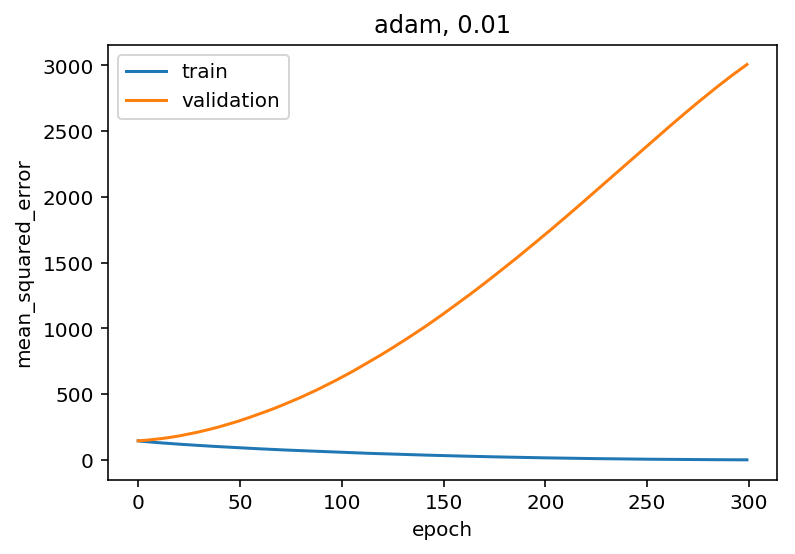

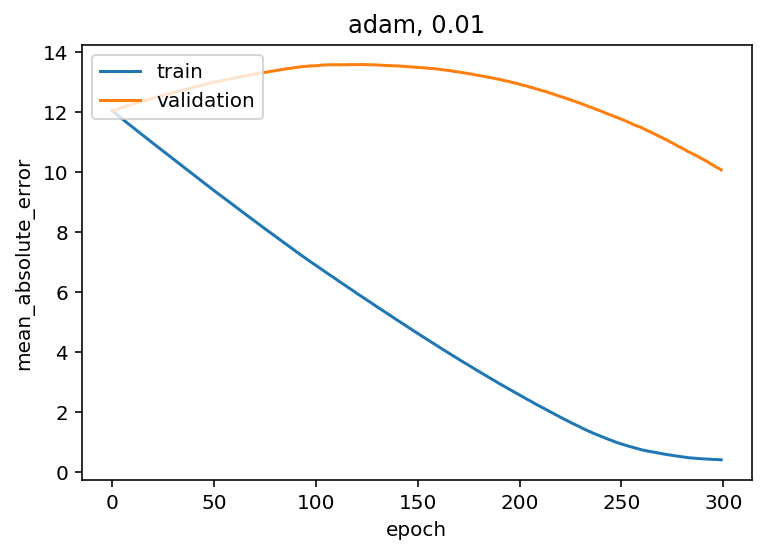

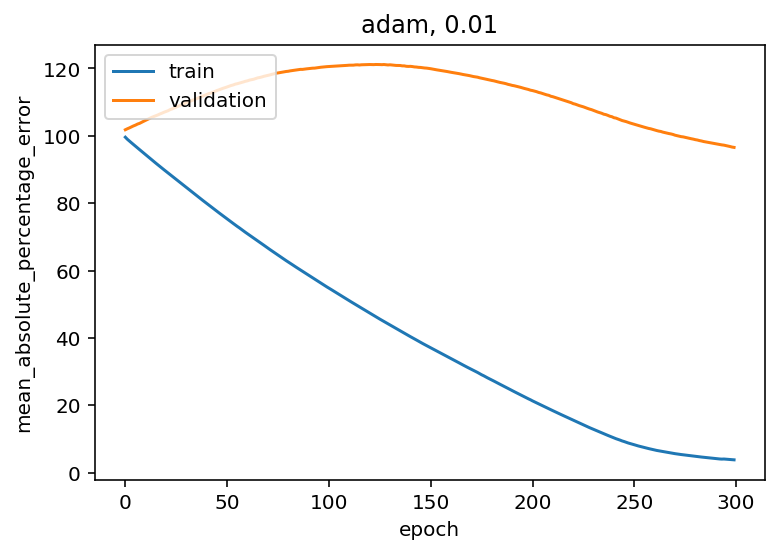

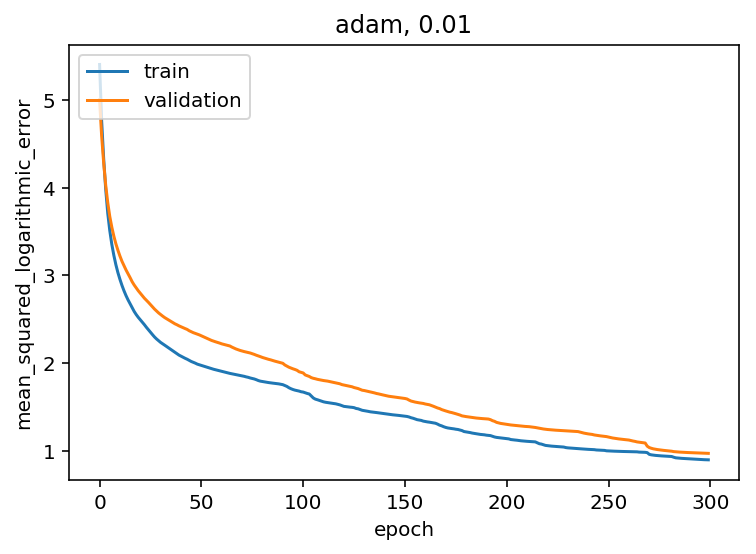

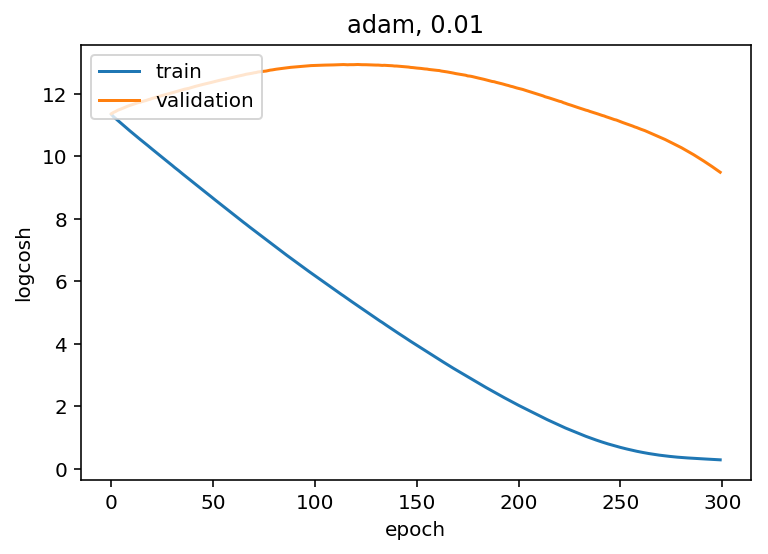

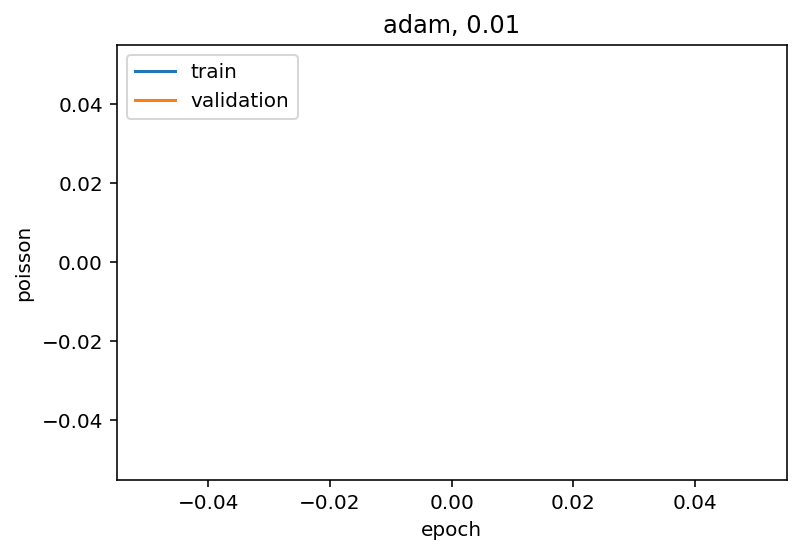

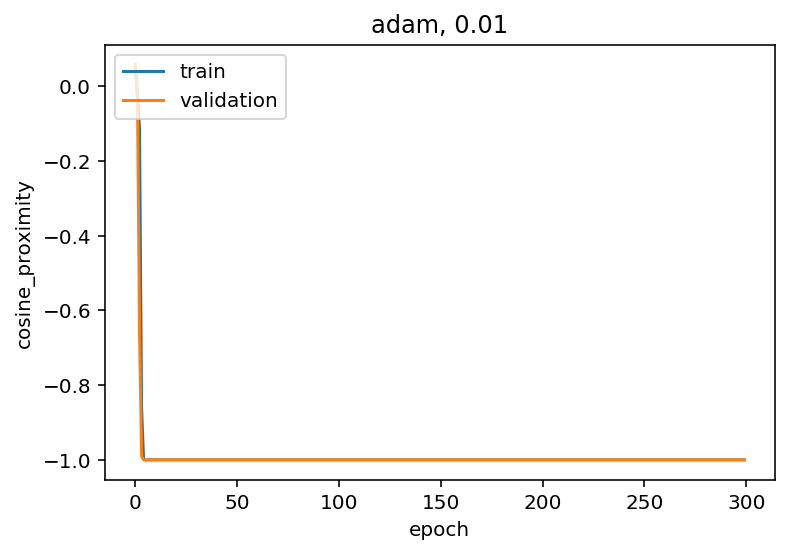

In [86]:
# Fix the optimizer in order to select the best loss function
for loss in losses:
    model = model_build()
    model, history = model_compile_fit(model, loss=loss, metrics=[loss], epochs=300)
    plot(history, loss, 'adam')

In [87]:
loss = 'mean_squared_logarithmic_error'

#### Different Optimizers

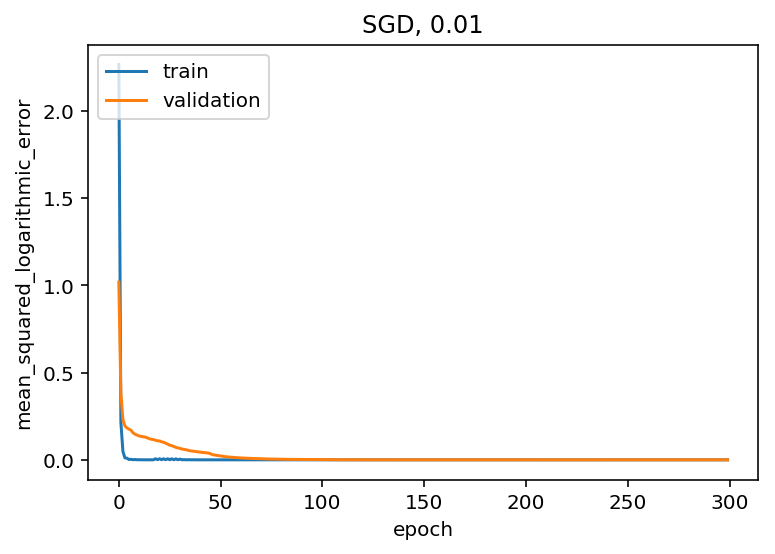

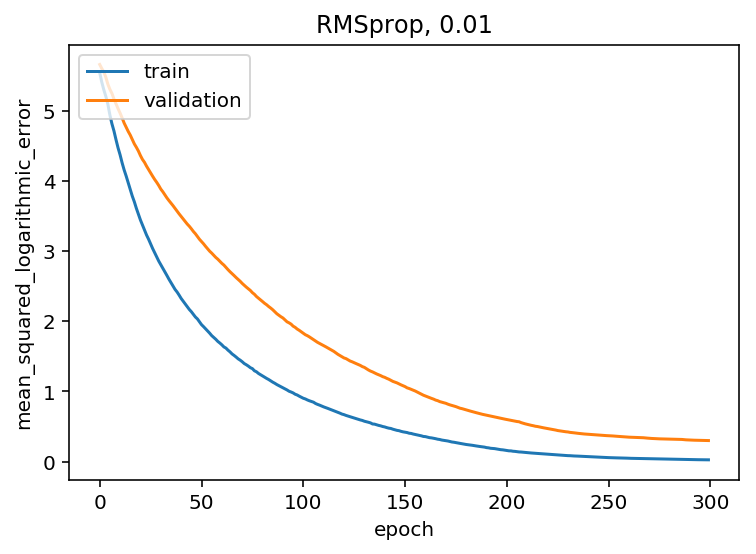

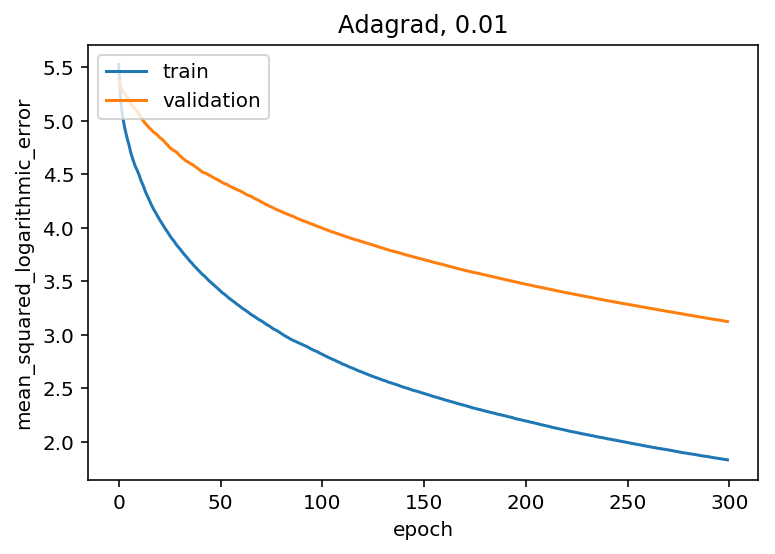

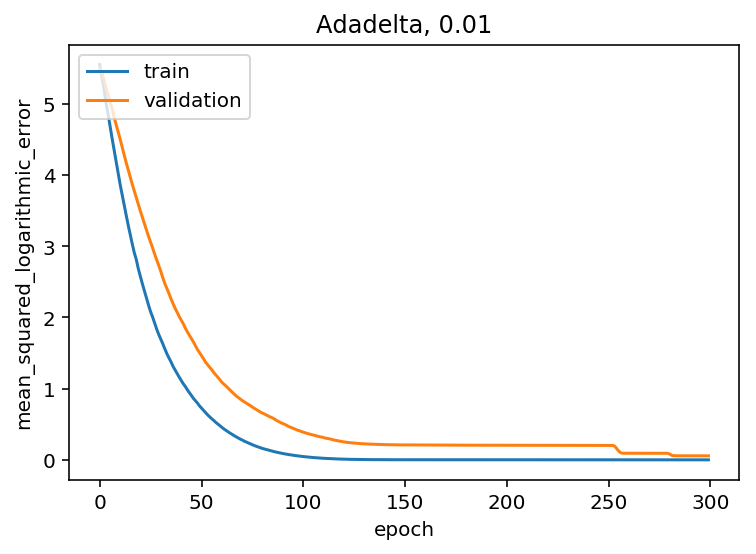

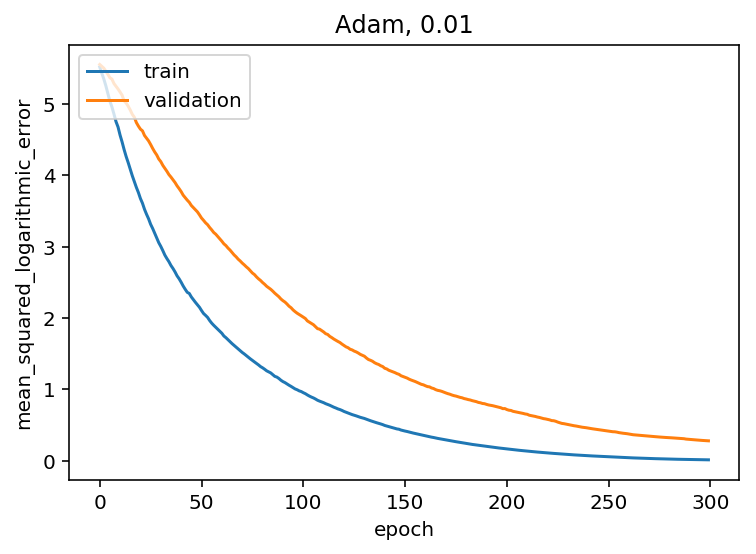

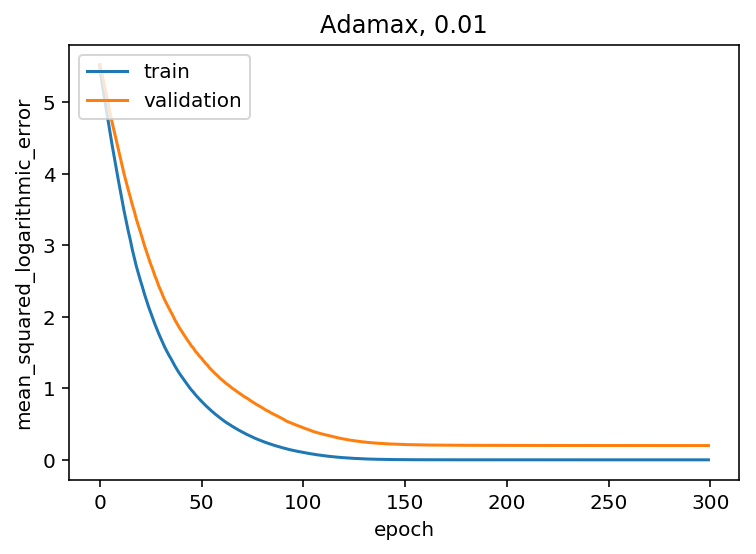

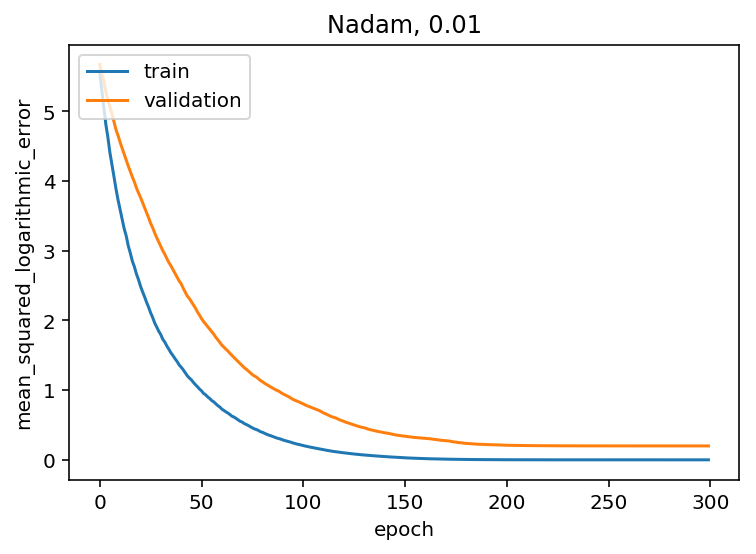

In [88]:

for opt in optimizers:
    model = model_build()
    model, history = model_compile_fit(model, optimizer=opt, metrics=[loss], epochs=300)
    plot(history, loss, opt)

In [89]:
opt = 'Adamax'

#### Different Lambdas

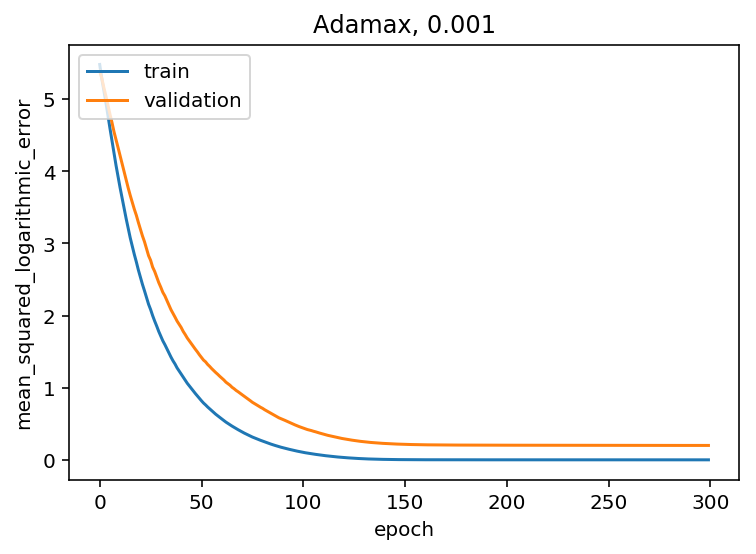

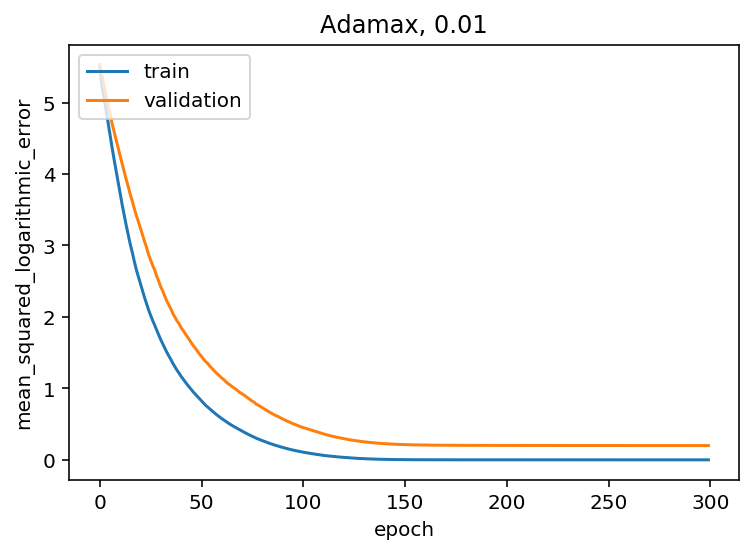

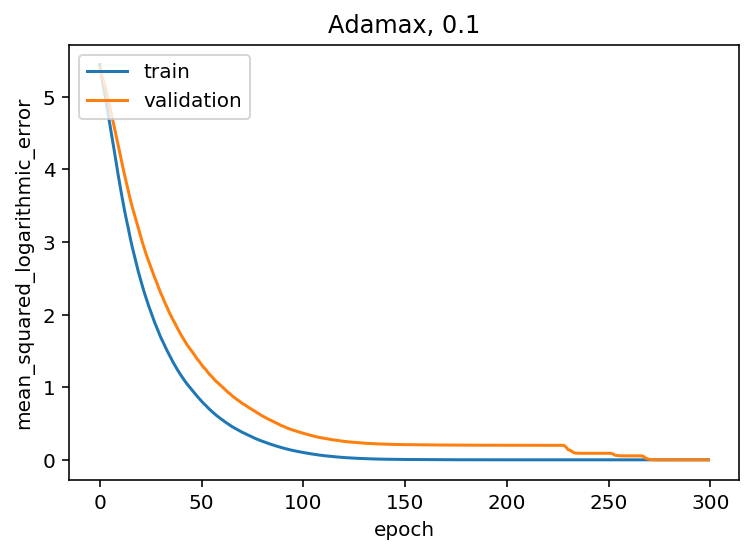

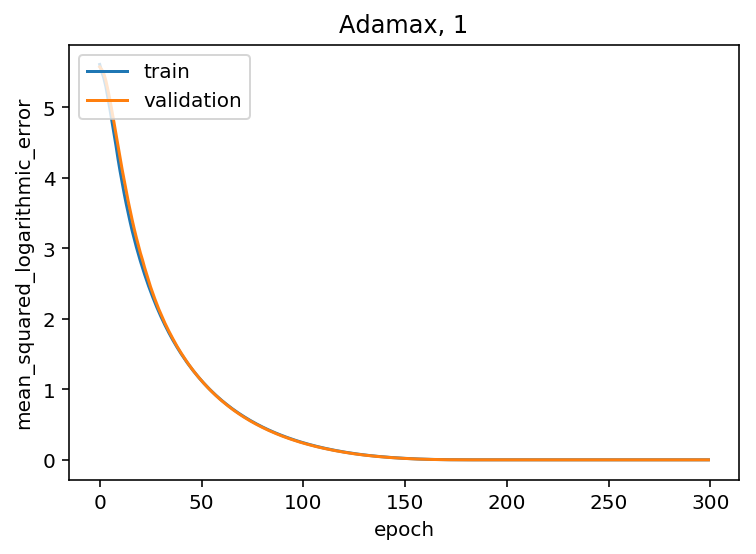

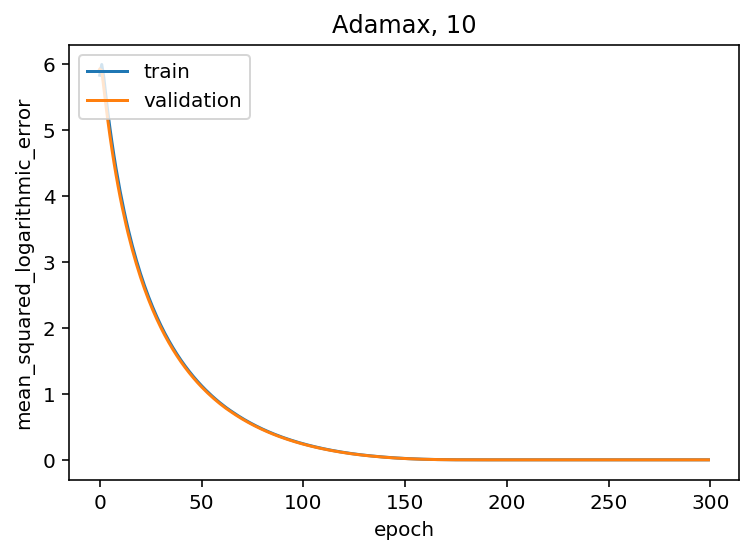

In [90]:
for reg in lambdas:
    model = model_build(reg)
    model, history = model_compile_fit(model, optimizer=opt, metrics=[loss], epochs=300)
    plot(history, loss, opt, reg)

In [91]:
reg=.1

In [92]:
model = model_build(reg)
model, history = model_compile_fit(model, optimizer=opt, loss=loss, metrics=[loss], epochs=500)

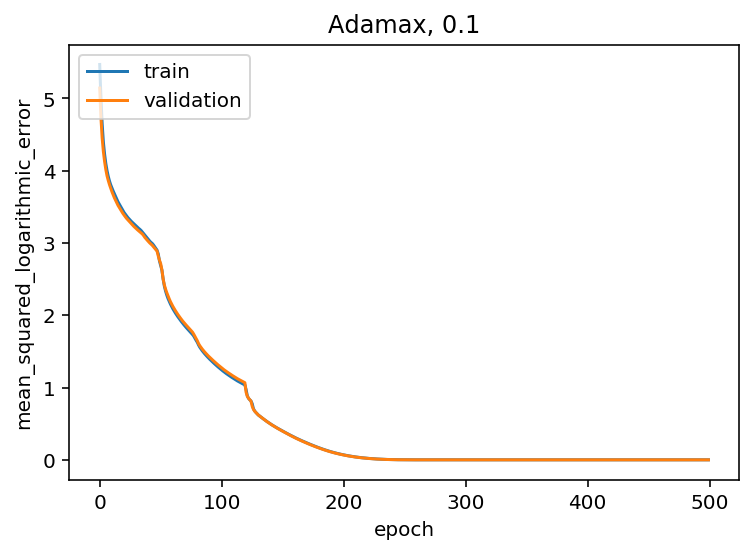

In [93]:
plot(history, loss=loss, optimizer=opt, reg=reg)

[[ 12.09976673]
 [ 12.12256622]
 [ 12.12014961]
 ..., 
 [ 12.13159847]
 [ 12.14575958]
 [ 12.11585999]]


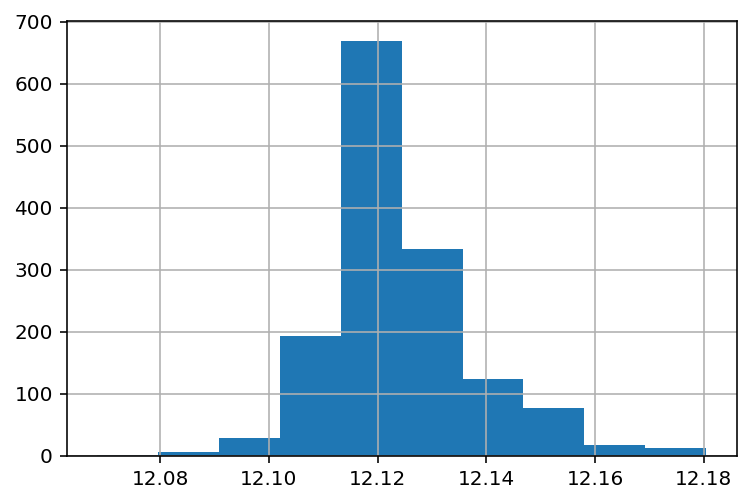

In [94]:
print(model.predict(X_test))
pd.Series(model.predict(X_test)[:,0]).hist()

In [95]:
print(np.average(history.history['val_' + loss]))

0.628746120935


## Logistic Regression-Heart
            Here, we are trying to increase the peoples' attention regarding the heart diseases. Like any disease, it is  always better to know if you are sick early so you can get the treatment you need before it is too late.    
            Therefore, we use a dataset that gathered some information about two groups: a group with a heart disease and the other group has no disease. The gathered information includes age, chest pain type, fasting blood sugar, etc.    
            Your goal is to train a logistic regression model to predict if a person has a heart disease or not depending on the given information.

### Imports

In [96]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.regularizers import l2
from keras.utils import np_utils

### Data Reading

In [97]:
dataset = pd.read_csv("heart.csv")

X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

### Data Splitting

In [98]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.75, random_state=0)
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, train_size=0.8, random_state=0)

C:\Users\lenovo pc\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [125]:
feature_len = train_X.shape[1]
display(dataset.head())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Model

#### Model Building

In [100]:
def model_build(reg=.1):
    model = Sequential()
    model.add(Dense(1, input_dim=feature_len, activation='sigmoid', kernel_regularizer=l2(reg)))
    return model

#### Model Compiling

In [101]:
def model_compile_fit(model, loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'], epochs=150):
    model.compile(loss=loss, metrics=metrics, optimizer=optimizer)
    history = model.fit(train_X, train_y, verbose=0, batch_size=1, epochs=epochs)
    return model, history

#### Plotting

In [102]:
def plot(history, accuracy, optimizer='sgd', loss='binary_crossentropy', reg=.01):
    plt.plot(history.history['loss'])
    plt.plot(history.history['acc'])
    plt.title('Optimizer: ' + optimizer + ', Lambda: ' + str(reg) + ', Accuracy: ' + str(accuracy*100) + '%')
    plt.ylabel(loss)
    plt.xlabel('epoch')
    plt.legend(['loss', 'accuracy'], loc='upper left')
    plt.show()

### Hyperparameter Tuning

#### Listing

In [113]:
lambdas = [.001, .01, .1, 1, 10]
losses = ['binary_crossentropy', 'squared_hinge', 'hinge']
optimizers = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']

#### Different Lambdas

In [114]:
best_reg = .01

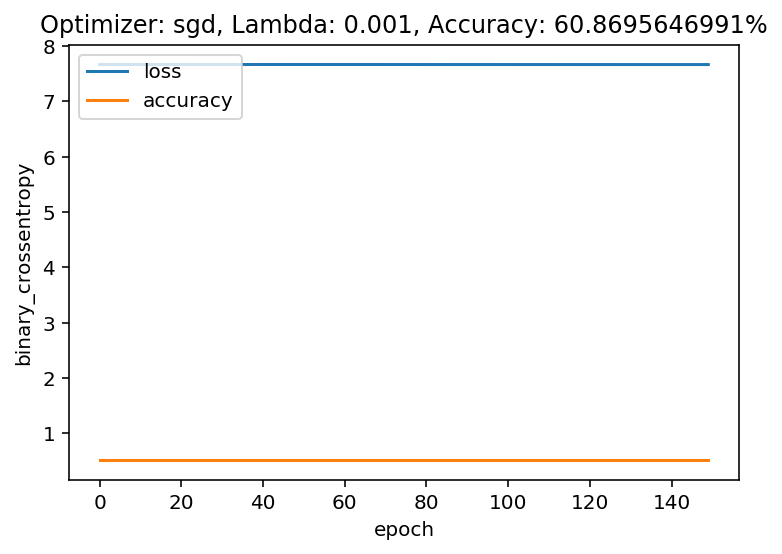

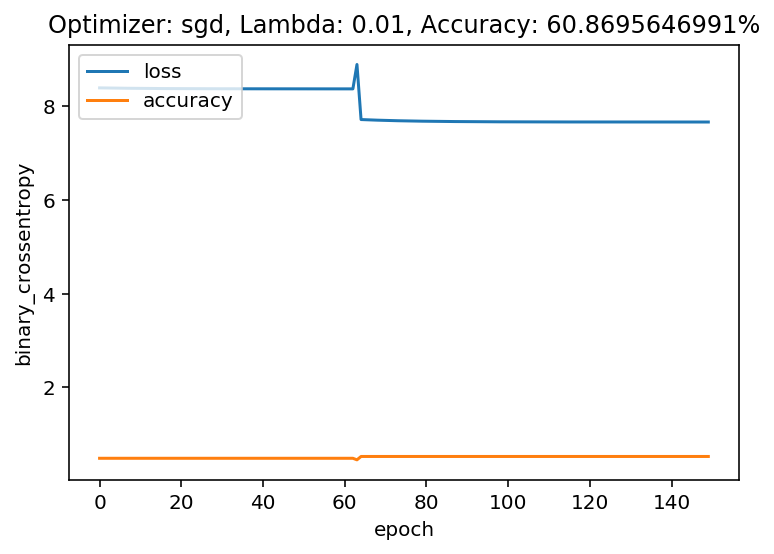

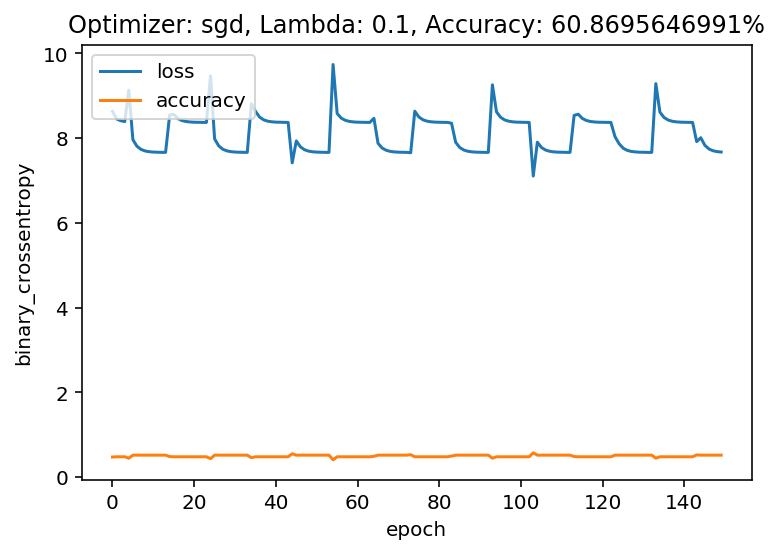

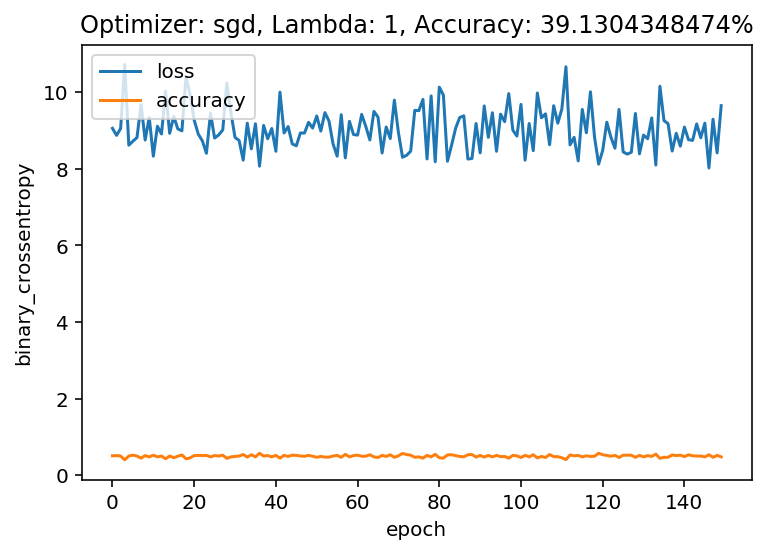

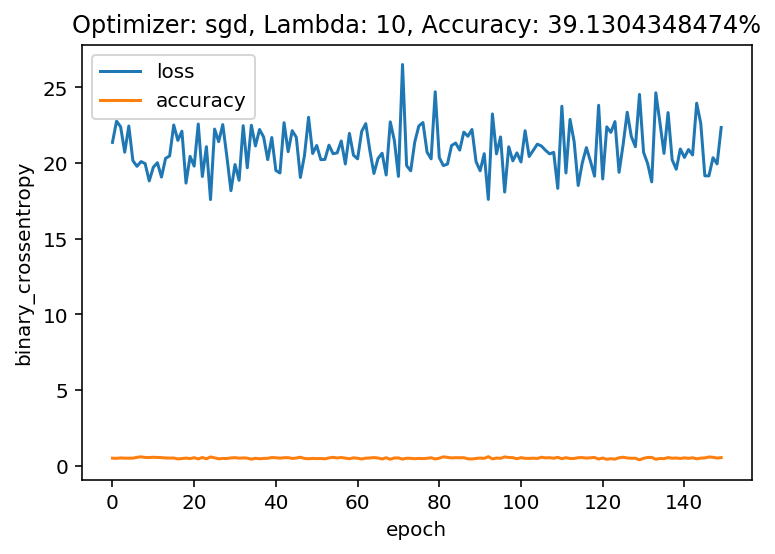

In [115]:
max_acc = -1
for reg in lambdas:
    model = model_build(reg)
    model, history = model_compile_fit(model)
    scores = model.evaluate(val_X, val_y, batch_size=16, verbose=0)
    plot(history, scores[1], reg=reg)
    if scores[1] > max_acc:
        max_acc = scores[1]
        best_reg = reg

#### Different Loss Functions

In [116]:
best_loss = 'binary_crossentropy'

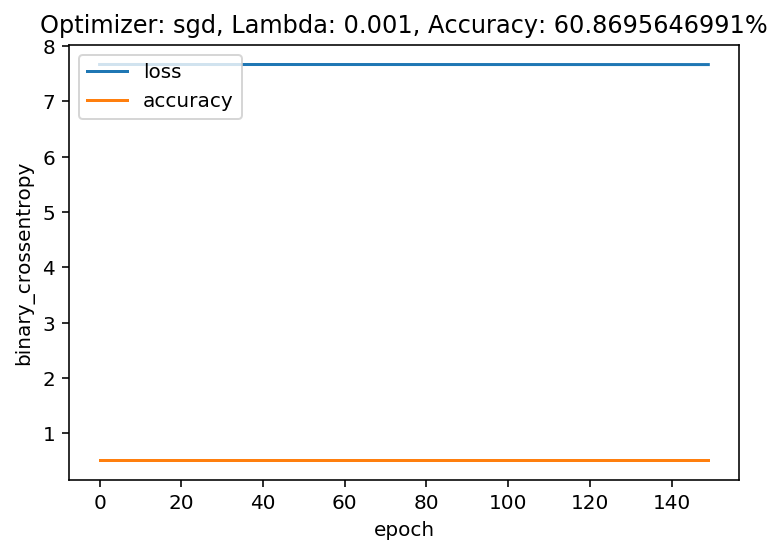

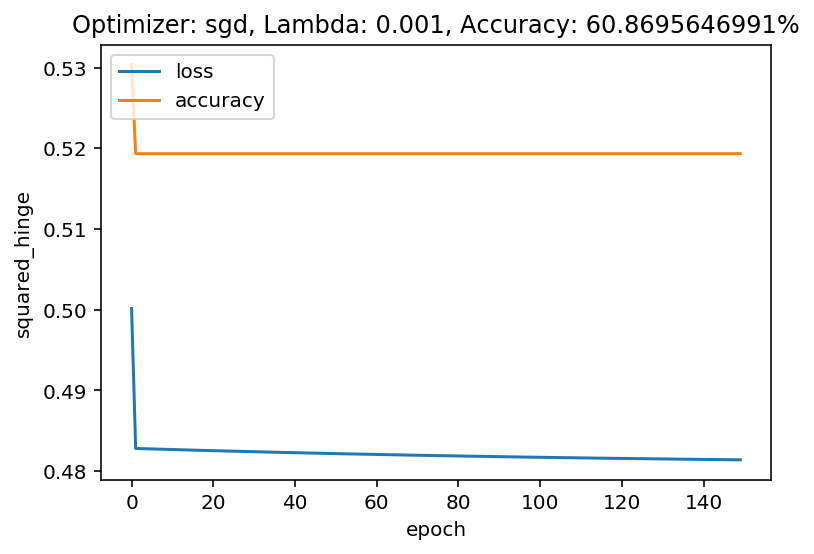

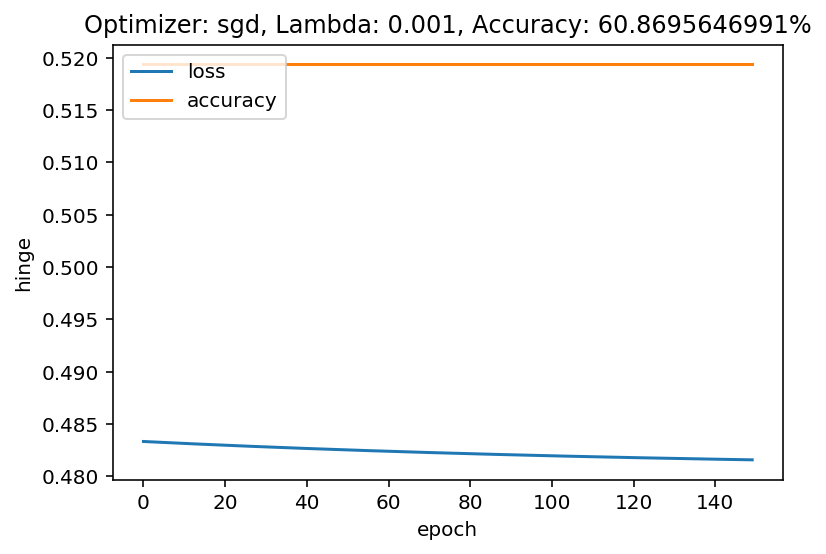

In [117]:
max_acc = -1
for loss in losses:
    model = model_build(best_reg)
    model, history = model_compile_fit(model, loss=loss)
    scores = model.evaluate(val_X, val_y, batch_size=16, verbose=0)
    plot(history, scores[1], reg=best_reg, loss=loss)
    if scores[1] > max_acc:
        max_acc = scores[1]
        best_loss = loss

#### Different Opimizers

In [118]:
best_opt='adam'

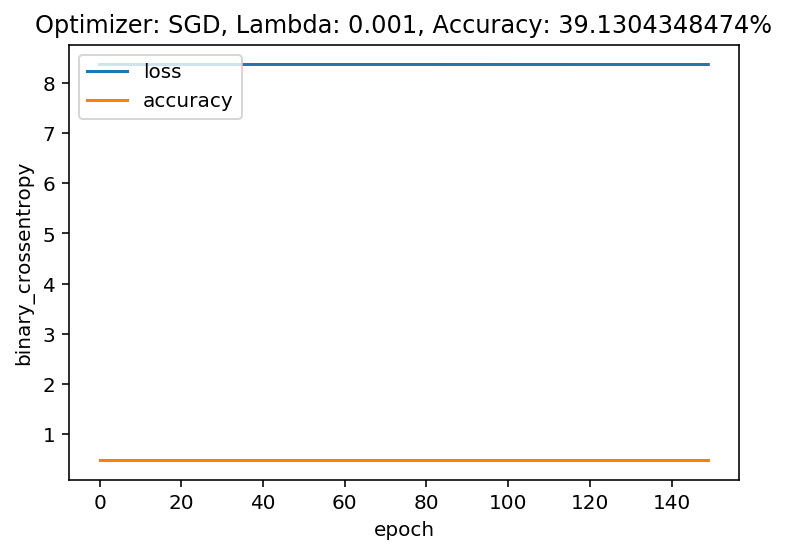

0.391304348474 -1


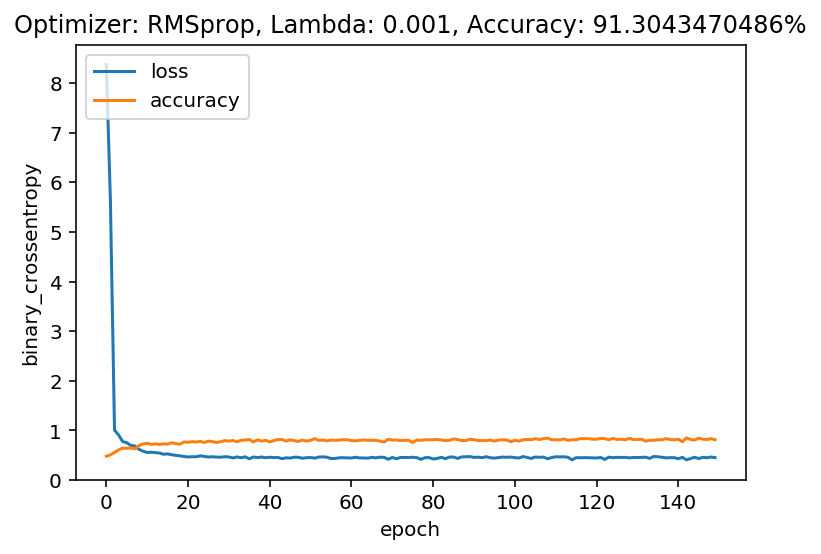

0.913043470486 0.391304348474


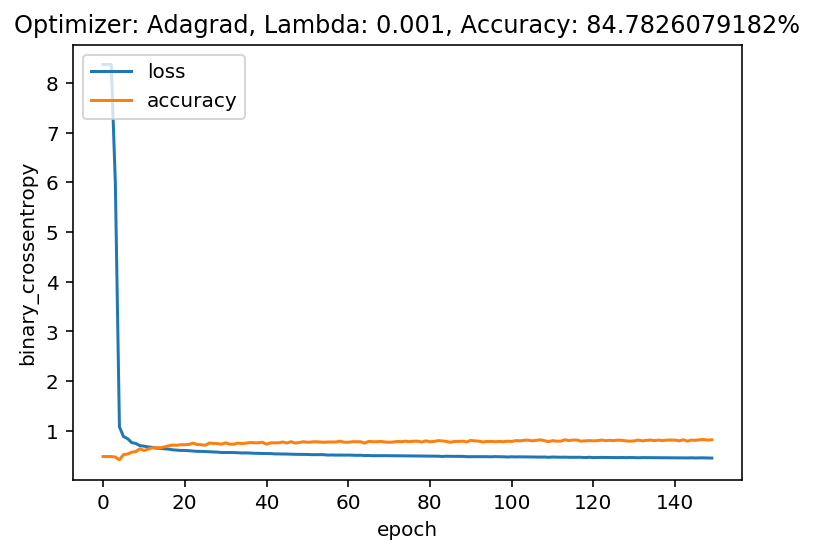

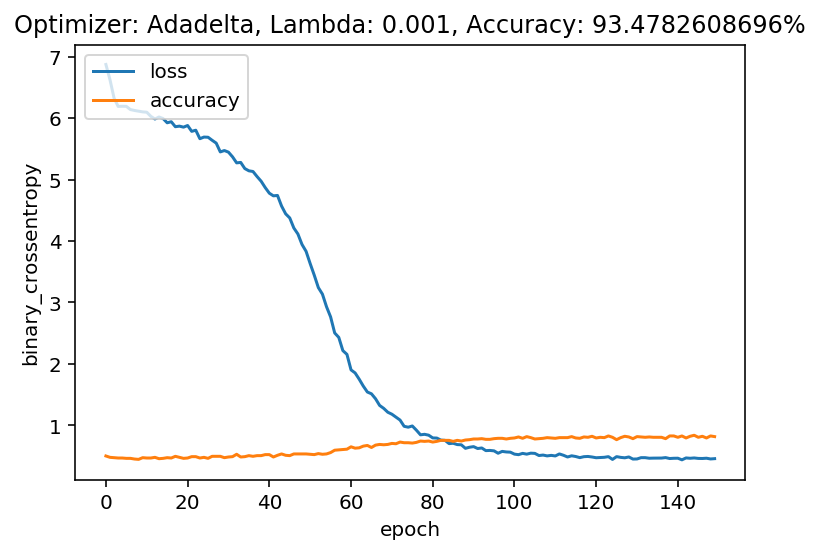

0.934782608696 0.913043470486


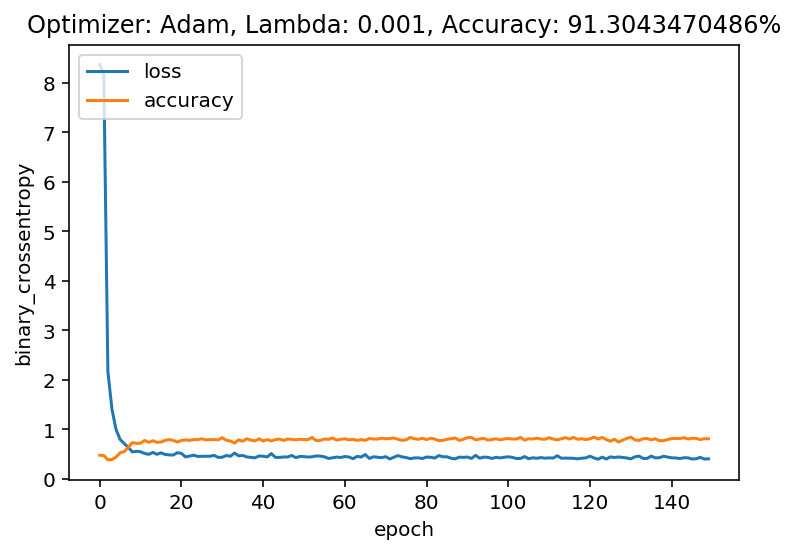

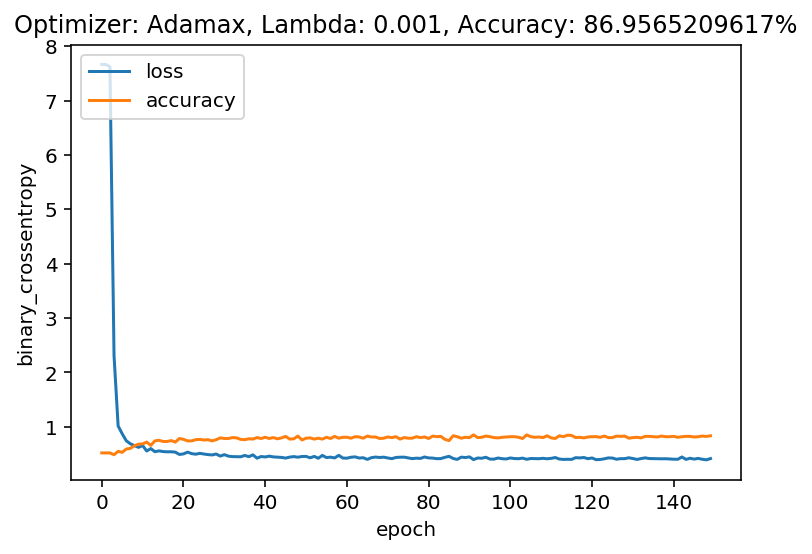

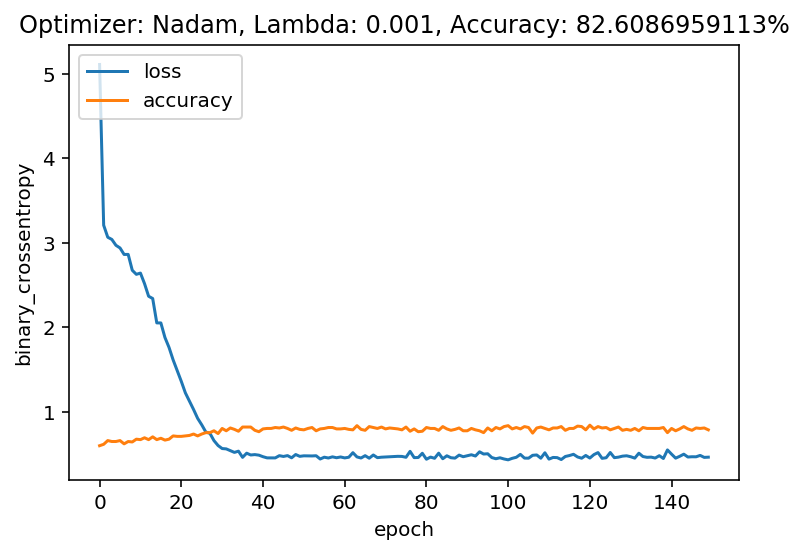

In [119]:
max_acc = -1
for opt in optimizers:
    model = model_build(best_reg)
    model, history = model_compile_fit(model, loss=best_loss, optimizer=opt)
    scores = model.evaluate(val_X, val_y, batch_size=16, verbose=0)
    plot(history, scores[1], reg=best_reg, loss=best_loss, optimizer=opt)
    if scores[1] > max_acc:
        print(scores[1], max_acc)
        max_acc = scores[1]
        best_opt = opt

### Testing

In [140]:
model = model_build(best_reg)
model,history=model_compile_fit(model, loss=best_loss, optimizer=best_opt)
scores = model.evaluate(test_X, test_y, batch_size=16, verbose=0)
print("Test fraction correct (NN-Score) = {:.2f}".format(scores[0]))
print("Test fraction correct (NN-Accuracy) = {:.2f}".format(scores[1]))

Test fraction correct (NN-Score) = 0.42
Test fraction correct (NN-Accuracy) = 0.83


In [129]:
print("Best Hyperparameters are: ")
print("\tLambda: {}".format(best_reg))
print("\tLoss Function: " + best_loss)
print("\tOptimizer: " + best_opt)

Best Hyperparameters are: 
	Lambda: 0.001
	Loss Function: binary_crossentropy
	Optimizer: Adadelta
